<b> Best models </b>

In [1]:
columns_d = ['age',
 'age_o',
 'd_age',
 #'d_d_age',
 'samerace',
 'importance_same_race',
 'importance_same_religion',
 #'d_importance_same_race',
 #'d_importance_same_religion',
 'pref_o_attractive',
 'pref_o_sincere',
 'pref_o_intelligence',
 'pref_o_funny',
 'pref_o_ambitious',
 'pref_o_shared_interests',
 #'d_pref_o_attractive',
 #'d_pref_o_sincere',
 #'d_pref_o_intelligence',
 #'d_pref_o_funny',
 #'d_pref_o_ambitious',
 #'d_pref_o_shared_interests',
 'attractive_o',
 'sinsere_o',
 'intelligence_o',
 'funny_o',
 'ambitous_o',
 'shared_interests_o',
 #'d_attractive_o',
 #'d_sinsere_o',
 #'d_intelligence_o',
 #'d_funny_o',
 #'d_ambitous_o',
 #'d_shared_interests_o',
 'attractive_important',
 'sincere_important',
 'intellicence_important',
 'funny_important',
 'ambtition_important',
 'shared_interests_important',
 #'d_attractive_important',
 #'d_sincere_important',
 #'d_intellicence_important',
 #'d_funny_important',
 #'d_ambtition_important',
 #'d_shared_interests_important',
 'attractive',
 'sincere',
 'intelligence',
 'funny',
 'ambition',
 #'d_attractive',
 #'d_sincere',
 #'d_intelligence',
 #'d_funny',
 #'d_ambition',
 'attractive_partner',
 'sincere_partner',
 'intelligence_partner',
 'funny_partner',
 'ambition_partner',
 'shared_interests_partner',
 #'d_attractive_partner',
 #'d_sincere_partner',
 #'d_intelligence_partner',
 #'d_funny_partner',
 #'d_ambition_partner',
 #'d_shared_interests_partner',
 'sports',
 'tvsports',
 'exercise',
 'dining',
 'museums',
 'art',
 'hiking',
 'gaming',
 'clubbing',
 'reading',
 'tv',
 'theater',
 'movies',
 'concerts',
 'music',
 'shopping',
 'yoga',
 #'d_sports',
 #'d_tvsports',
 #'d_exercise',
 #'d_dining',
 #'d_museums',
 #'d_art',
 #'d_hiking',
 #'d_gaming',
 #'d_clubbing',
 #'d_reading',
 #'d_tv',
 #'d_theater',
 #'d_movies',
 #'d_concerts',
 #'d_music',
 #'d_shopping',
 #'d_yoga',
 'interests_correlate',
 #'d_interests_correlate',
 'expected_happy_with_sd_people',
 'expected_num_matches',
 #'d_expected_happy_with_sd_people',
 #'d_expected_num_interested_in_me',
 #'d_expected_num_matches',
 'like',
 'guess_prob_liked',
 #'d_like',
 #'d_guess_prob_liked',
 'met',
 'gender_female',
 'gender_male',
 'race_Asian/Pacific Islander/Asian-American',
 'race_Black/African American',
 'race_European/Caucasian-American',
 'race_Latino/Hispanic American',
 'race_Other',
 'race_o_?',
 'race_o_Asian/Pacific Islander/Asian-American',
 'race_o_Black/African American',
 'race_o_European/Caucasian-American',
 'race_o_Latino/Hispanic American',
 'race_o_Other',
 'field_anthropology',
 'field_architecture',
 'field_art',
 'field_biology',
 'field_business',
 'field_chemistry',
 'field_communications',
 'field_economics',
 'field_education',
 'field_engineering',
 'field_environmental science',
 'field_finance',
 'field_health',
 'field_history',
 'field_law',
 'field_literature',
 'field_mathematics',
 'field_medicine',
 'field_other/job',
 'field_philosophy',
 'field_physics',
 'field_political science',
 'field_psychology',
 'field_religion',
 'field_sociology']

In [17]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import pandas as pd

model_1 = XGBClassifier(subsample= 0.9, n_estimators = 500, max_depth = None, learning_rate = 0.1, 
colsample_bytree = 0.3, colsample_bylevel = 0.5, scale_pos_weight=5)
model_2= GradientBoostingClassifier(n_estimators= 300, learning_rate = 0.1)
model_3= RandomForestClassifier(n_estimators = 130, min_samples_split = 10, min_samples_leaf = 5, max_features = 'log2', 
max_depth = 15, criterion = 'entropy')
model_4 = ExtraTreesClassifier(n_estimators = 115, min_samples_split = 12, min_samples_leaf = 3,  
max_depth = None, criterion= 'gini')
model_5 = AdaBoostClassifier(n_estimators = 300, learning_rate = 0.1)
model_6 = DecisionTreeClassifier(criterion = 'entropy', max_depth = 15, max_features = 3, min_samples_leaf = 20, min_samples_split= 18)


X_train = pd.read_csv('../data/modelling/train/X_train.csv')
y_train = pd.read_csv('../data/modelling/train/y_train.csv')
y_train = y_train['match']
train = pd.concat([X_train, y_train], axis=1)

downsampled_train = pd.read_csv('../data/modelling/train/downsampled_train.csv')
upsampled_train = pd.read_csv('../data/modelling/train/upsampled_train.csv')
oversampled_train = pd.read_csv('../data/modelling/train/oversampled_sm_train.csv')

columns = list(upsampled_train.columns)
columns.remove('match')
X_train_downsampled = downsampled_train[columns]
y_train_downsampled = downsampled_train['match']
X_train_upsampled = upsampled_train[columns]
y_train_upsampled = upsampled_train['match']
X_train_oversampled_sm = oversampled_train[columns]
y_train_oversampled_sm = oversampled_train['match']

X_test= pd.read_csv('../data/modelling/test/X_test.csv')
y_test = pd.read_csv('../data/modelling/test/y_test.csv')
y_test = y_test['match']

X_val = pd.read_csv('../data/modelling/validation/X_val.csv')
y_val = pd.read_csv('../data/modelling/validation/y_val.csv')
y_val = y_val['match']

# without categorical variables
X_train_d = X_train[columns_d]
X_train_downsampled_d = X_train_downsampled[columns_d]
X_train_upsampled_d = X_train_upsampled[columns_d]
X_train_oversampled_sm_d = X_train_oversampled_sm[columns_d]
X_test_d = X_test[columns_d]

most_important_variables_dt = ['like', 'attractive_o', 'expected_num_matches', 'attractive_partner', 'funny_o', 'interests_correlate', 
'shared_interests_o', 'age_o', 'guess_prob_liked', 'pref_o_sincere']

# most important features
X_train_imp = X_train[most_important_variables_dt]
X_train_downsampled_imp = X_train_downsampled[most_important_variables_dt]
X_train_upsampled_imp = X_train_upsampled[most_important_variables_dt]
X_train_oversampled_sm_imp = X_train_oversampled_sm[most_important_variables_dt]
X_test_imp = X_test[most_important_variables_dt]

#model_1.fit(X_train_upsampled, y_train_upsampled)
#model_2.fit(X_train_oversampled_sm_d, y_train_oversampled_sm)
#model_3.fit(X_train_oversampled_sm_d, y_train_oversampled_sm)
#model_4.fit(X_train_upsampled_d, y_train_upsampled)
#model_5.fit(X_train_imp, y_train)
#model_6.fit(X_train_imp, y_train)

model_1.fit(X_train, y_train)
model_2.fit(X_train, y_train)
model_3.fit(X_train, y_train)
model_4.fit(X_train, y_train)
model_5.fit(X_train, y_train)
model_6.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=15, max_features=3,
                       min_samples_leaf=20, min_samples_split=18)

# Ensemble Voting

In [18]:
from sklearn.model_selection import StratifiedKFold 
from sklearn.model_selection import cross_val_score 
from sklearn.ensemble import  VotingClassifier

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

def get_clf_name(classifier_object):
    """
    Returns  a string representing the name of the input classifier object. 
    
    """
    name_ = str(type(classifier_object)).split('.')[-1]
    for char in """ "'>() """:  # triple-quoted string definition allows us to include " and ' as characters
        name_ = name_.replace(char,"")  # delete unwanted characters from the name
    
    return name_

estimator_ensemble = [('XGB', model_1),
                      ('GB', model_2),
                      ('RF', model_3),
                      ('ET', model_4),
                      ('AB', model_5),
                      ('DT', model_6)]

kfold = StratifiedKFold(n_splits=10, random_state=27, shuffle=True)

# get accuracies of our individual trained classifiers for comparison
estimators = [estimator_ensemble[i][1] for i in range(len(estimator_ensemble))]
clf_names = [get_clf_name(clf) for clf in estimators]
for clf, clf_name in zip(estimators, clf_names):
    scores = cross_val_score(clf, X=X_train, y=y_train, cv=kfold, scoring='accuracy')
    print("Accuracy: %0.4f (+/- %0.4f) [%s]" % (scores.mean(), scores.std(), clf_name))


Accuracy: 0.8565 (+/- 0.0106) [XGBClassifier]
Accuracy: 0.8626 (+/- 0.0079) [GradientBoostingClassifier]
Accuracy: 0.8456 (+/- 0.0054) [RandomForestClassifier]
Accuracy: 0.8473 (+/- 0.0075) [ExtraTreesClassifier]
Accuracy: 0.8534 (+/- 0.0112) [AdaBoostClassifier]
Accuracy: 0.8252 (+/- 0.0106) [DecisionTreeClassifier]


In [21]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# fit and score the majority vote classifier on our entire classifier ensemble
mvc = VotingClassifier(estimators=estimator_ensemble, voting='hard', weights=None, n_jobs=-1)
scores_1 = cross_val_score(estimator=mvc, X=X_train, y=y_train, cv=kfold, scoring='accuracy')
print("Accuracy: %0.4f (+/- %0.4f) [%s]" % (scores_1.mean(), scores_1.std(), get_clf_name(mvc)))



mvc = VotingClassifier(estimators=estimator_ensemble, voting='soft', weights=None, n_jobs=-1)
scores_2 = cross_val_score(estimator=mvc, X=X_train, y=y_train, cv=kfold, scoring='accuracy')
print("Accuracy: %0.4f (+/- %0.4f) [%s]" % (scores_2.mean(), scores_2.std(), get_clf_name(mvc)))

Accuracy: 0.8520 (+/- 0.0070) [VotingClassifier]
Accuracy: 0.8626 (+/- 0.0082) [VotingClassifier]


Our voting classifier does not appear to be offering any overall accuracy improvement. A possible reason is that its constituent classifiers are too highly correlated, and therefore not very 'independent' (so we're not getting the full mathematical benefit of voting).


### Reducing the Number of Classifiers
The first thing we can try is reducing the number of classifiers, choosing those that tend to be more 'independent' (i.e. whose predictions are not as highly correlated with one-another). We will retrieve our training set predictions for each classifier, obtain their Pearson correlation coefficients, and display these in a heatmap:

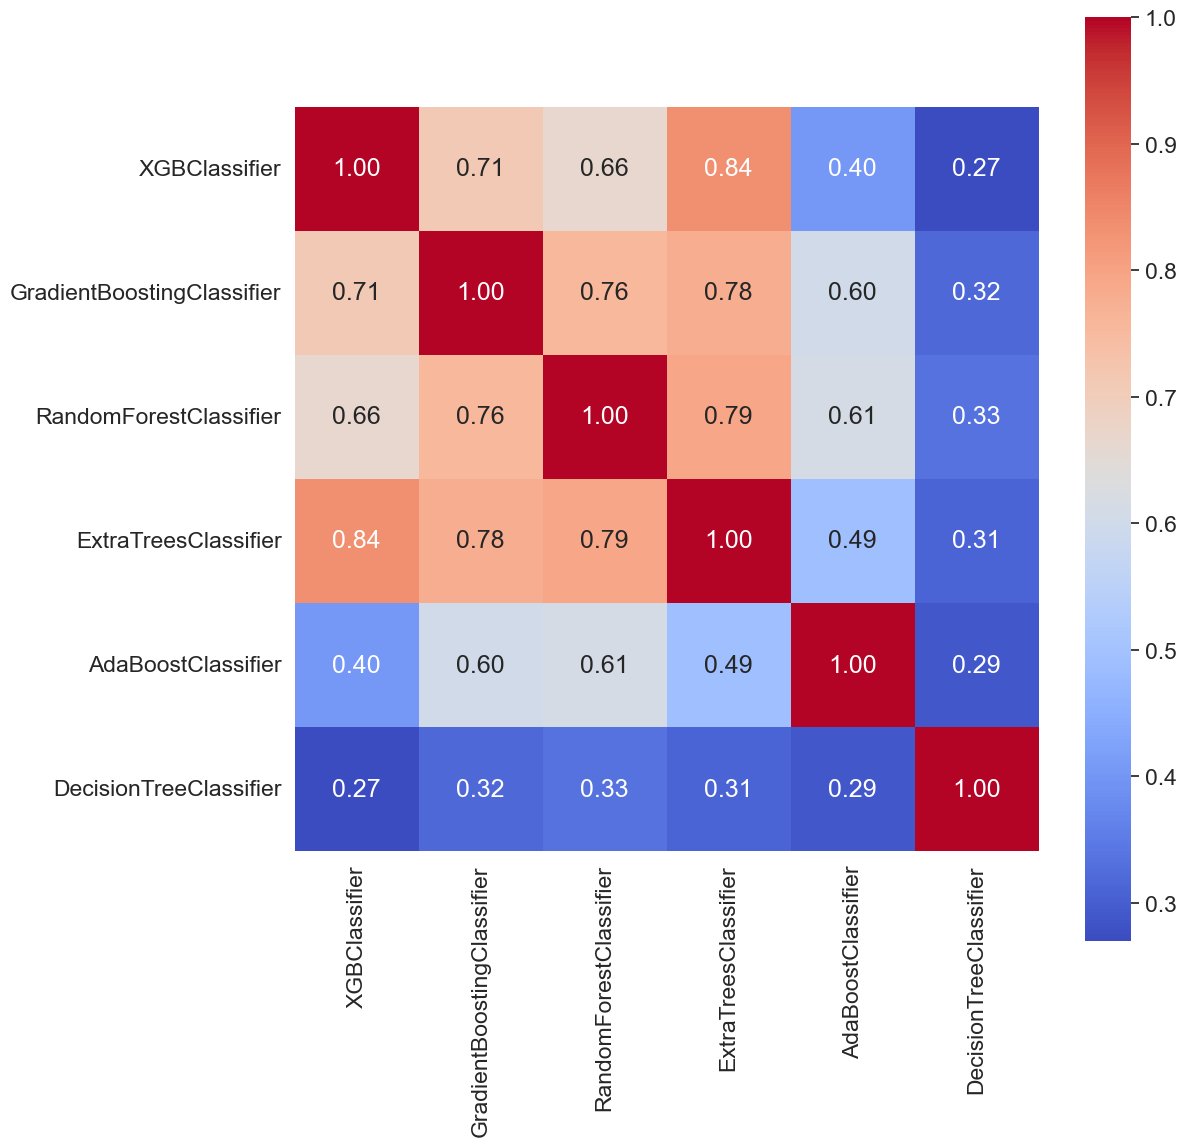

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# obtain class predictions
train_probas = [clf.fit(X_train, y_train).predict(X_train) 
                for clf in estimators]

# format into pandas dataframe
df_train_probas = pd.DataFrame(columns=clf_names)
for name, probas in zip(clf_names, train_probas):
    df_train_probas[name] = probas

# generate correlation matrix
plt.figure(figsize=(12,12))
sns.set(font_scale=1.5)
g = sns.heatmap(df_train_probas.corr(), square=True, annot=True, cmap='coolwarm', fmt='.2f')

Findings: The XGB, Gradient Boosting, Random Forest and ExtraTree classifiers all appear strongly correlated with one another. Let's omit half of these classifiers, keeping the two with the highest accuracy scores (XGB, Gradient Boosting) and (XGB, Random Forest).


Let's now see if our voting classifier improves:

In [32]:
estimator_ensemble = [('XGB', model_1),
                      ('GB', model_2),
                      ('AB', model_5)]

kfold = StratifiedKFold(n_splits=10, random_state=27, shuffle=True)

# get accuracies of our individual trained classifiers for comparison
estimators = [estimator_ensemble[i][1] for i in range(len(estimator_ensemble))]

# fit and score the majority vote classifier on our entire classifier ensemble
mvc = VotingClassifier(estimators=estimator_ensemble, voting='hard', weights=None, n_jobs=-1)
scores = cross_val_score(estimator=mvc, X=X_train, y=y_train, cv=kfold, scoring='accuracy')
print("Accuracy: %0.4f (+/- %0.4f) [%s]" % (scores.mean(), scores.std(), get_clf_name(mvc)))

# fit and score the majority vote classifier on our entire classifier ensemble
mvc = VotingClassifier(estimators=estimator_ensemble, voting='soft', weights=None, n_jobs=-1)
scores = cross_val_score(estimator=mvc, X=X_train, y=y_train, cv=kfold, scoring='accuracy')
print("Accuracy: %0.4f (+/- %0.4f) [%s]" % (scores.mean(), scores.std(), get_clf_name(mvc)))

Accuracy: 0.8662 (+/- 0.0095) [VotingClassifier]
Accuracy: 0.8606 (+/- 0.0088) [VotingClassifier]


In [33]:
estimator_ensemble = [('XGB', model_1),
                      ('RF', model_3),
                      ('AB', model_5)]

kfold = StratifiedKFold(n_splits=10, random_state=27, shuffle=True)

# get accuracies of our individual trained classifiers for comparison
estimators = [estimator_ensemble[i][1] for i in range(len(estimator_ensemble))]
clf_names = [get_clf_name(clf) for clf in estimators]


# fit and score the majority vote classifier on our entire classifier ensemble
mvc = VotingClassifier(estimators=estimator_ensemble, voting='hard', weights=None, n_jobs=-1)
scores = cross_val_score(estimator=mvc, X=X_train, y=y_train, cv=kfold, scoring='accuracy')
print("Accuracy: %0.4f (+/- %0.4f) [%s]" % (scores.mean(), scores.std(), get_clf_name(mvc)))

# fit and score the majority vote classifier on our entire classifier ensemble
mvc = VotingClassifier(estimators=estimator_ensemble, voting='soft', weights=None, n_jobs=-1)
scores = cross_val_score(estimator=mvc, X=X_train, y=y_train, cv=kfold, scoring='accuracy')
print("Accuracy: %0.4f (+/- %0.4f) [%s]" % (scores.mean(), scores.std(), get_clf_name(mvc)))

Accuracy: 0.8568 (+/- 0.0082) [VotingClassifier]
Accuracy: 0.8636 (+/- 0.0070) [VotingClassifier]


We've managed to obtain a small accuracy improvement over the individual base classifiers. (not worth it)

# Ensemble Stacking

Stacking is a much more versatile way of combining classifier results. It involves the creation of an additional classifier layer that takes the predictions of the base classifiers as its input ("meta-features") for training. In this way, the 2nd-level classifier can learn the relative strengths and weaknesses of its base classifiers to make a smarter decision about how to weigh their predictions.

I'll choose to train our 2nd-level classifier using 'out-of-fold' predictions from the base classifier set. The procedure is as follows:

- Split the training dataset into n folds.
- For each of these folds, use one as a 'validation set' while training the base classifiers on all the others. Then obtain predictions on the 'validation set'.
- After repeating step 2 for all folds, combine the 'validation set' predictions. These are our 'out-of-fold' predictions; each of these predictions were made by classifiers that hadn't seen that particular sample before.
- Use these out-of-fold predictions for each classifier as the input training features for our 2nd-level classifer.
Below I define a function for obtaining the out-of-fold predictions for a set of input classifiers:

In [37]:
def get_oof_predictions(classifiers, X_data, y_data, cv_splits=5, random_state=27):
    
    """
    Returns out-of-fold predictions, as a pandas dataframe, for the input list of classifiers.  
    
    """
    clf_names = [get_clf_name(clf) for clf in classifiers]
    oof_preds = pd.DataFrame(columns=clf_names)
    
    kfold = StratifiedKFold(n_splits=cv_splits, random_state=random_state, shuffle=True)
    
    for i, clf in enumerate(classifiers):
        
        this_clf_oof_preds = y_data.copy()  # entries will be overwritten
        
        for (train, test) in kfold.split(X_data, y_data):
        
            clf.fit(X_data.iloc[train], y_data.iloc[train])
            this_clf_oof_preds.iloc[test] = clf.predict(X_data.iloc[test])
            
        oof_preds[clf_names[i]] = this_clf_oof_preds
        
    return oof_preds

Now it comes to the decision about which classifiers to include. As before, it's best to pick classifiers that are not as strongly correlated with one another. We've chosen classifiers based on the heatmap in the above section and have found the optimal set based on some trial and error. We obtain the out-of-fold (OOF) predictions for these below:

In [39]:
estimator_ensemble = [model_1, model_3, model_5]

oof_preds = get_oof_predictions(classifiers=estimator_ensemble, 
                                X_data=X_train, 
                                y_data=y_train)

oof_preds.head(5)

,XGBClassifier,RandomForestClassifier,AdaBoostClassifier
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,1.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0


For our 2nd-level classifier, we'll use the popular XGB technique.

In [41]:
level2_xgb = XGBClassifier(seed=27, nthread=-1, objective='binary:logistic', n_estimators=1000)

kfold = StratifiedKFold(n_splits=10, random_state=27, shuffle=True)
scores = cross_val_score(estimator=level2_xgb, X=oof_preds, y=y_train, cv=kfold, scoring='accuracy')
print("Accuracy: %0.4f (+/- %0.4f) [%s]" % (scores.mean(), scores.std(), 
                                            'Stacking with ' + get_clf_name(level2_xgb)))

Accuracy: 0.8590 (+/- 0.0076) [Stacking with XGBClassifier]
